In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import re
pd.options.display.max_columns = None

In [2]:
data= pd.read_csv('data_seleccionada.csv')
data.head(2)

,Unnamed: 0,q_1_age,q_2_gender,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended,q_15_years_using_ml,q_20_industry,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml,q_24_main_activities_work,q_25_yearly_compensation,q_26_ml_invested_money,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q_41_primary_da_tool
0,0,50-54,Man,Other,"Python, R",Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),None of these activities are an important par...,"25,000-29,999",$100-$999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
1,1,50-54,Man,Program/Project Manager,"SQL, C, C++, Java",Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,Build and/or run the data infrastructure that...,"60,000-69,999",$0 ($USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)"


### `q5 empleo y q37b ml tools en dos años` 

- ¿Cuál es la herramienta por la que apuestan(dependiendo del puesto de trabajo), que va a despuntar en 2 años?

In [3]:
d1 = data.copy()

In [4]:
d1.drop(['q37_b_other','q37_b_part_7'], axis=1, inplace = True ) #Eliminamos las columnas 'q37_b_other/'q37_b_part_7' porque no tienen información relevante para la visualización de nuestros datos.

In [5]:
d1['q_5_role'].unique()

array(['Other', 'Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Currently not employed', 'Student',
       'Data Scientist', 'Data Analyst', 'Machine Learning Engineer',
       'Business Analyst', 'Data Engineer', 'Product Manager',
       'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

In [6]:
d37 = d1[['q37_b_part_1','q37_b_part_2','q37_b_part_3','q37_b_part_4','q37_b_part_5','q37_b_part_6']]

In [7]:
d37

,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,DataRobot AutoML,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
25968,NaN,NaN,NaN,NaN,NaN,NaN
25969,NaN,NaN,NaN,NaN,NaN,NaN
25970,NaN,NaN,NaN,NaN,NaN,NaN
25971,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
d37 = d37.replace(np.nan,"null")

In [9]:
d37['q37'] = d37[['q37_b_part_1','q37_b_part_2','q37_b_part_3','q37_b_part_4','q37_b_part_5','q37_b_part_6']].apply(' '.join, axis=1)

In [10]:
d37

,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37
0,null,null,null,null,null,null,null null null null null null
1,Google Cloud AutoML,null,null,null,null,null,Google Cloud AutoML null null null null null
2,null,null,null,DataRobot AutoML,null,null,null null null DataRobot AutoML null null
3,null,null,null,null,null,null,null null null null null null
4,null,null,null,null,null,null,null null null null null null
...,...,...,...,...,...,...,...
25968,null,null,null,null,null,null,null null null null null null
25969,null,null,null,null,null,null,null null null null null null
25970,null,null,null,null,null,null,null null null null null null
25971,null,null,null,null,null,null,null null null null null null


In [11]:
d37.drop(['q37_b_part_1', 'q37_b_part_2', 'q37_b_part_3', 'q37_b_part_4',
       'q37_b_part_5', 'q37_b_part_6'], axis=1, inplace = True)

In [12]:
d1.head(2)

,Unnamed: 0,q_1_age,q_2_gender,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended,q_15_years_using_ml,q_20_industry,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml,q_24_main_activities_work,q_25_yearly_compensation,q_26_ml_invested_money,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q_41_primary_da_tool
0,0,50-54,Man,Other,"Python, R",Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),None of these activities are an important par...,"25,000-29,999",$100-$999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
1,1,50-54,Man,Program/Project Manager,"SQL, C, C++, Java",Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,Build and/or run the data infrastructure that...,"60,000-69,999",$0 ($USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)"


In [13]:
d37

,q37
0,null null null null null null
1,Google Cloud AutoML null null null null null
2,null null null DataRobot AutoML null null
3,null null null null null null
4,null null null null null null
...,...
25968,null null null null null null
25969,null null null null null null
25970,null null null null null null
25971,null null null null null null


In [14]:
lista =list(d37['q37'].unique())
lista

['null null null null null null',
 ' Google Cloud AutoML  null null null null null',
 'null null null  DataRobot AutoML  null null',
 ' Google Cloud AutoML  null null null null   Azure Automated Machine Learning ',
 'null null null null null   Azure Automated Machine Learning ',
 ' Google Cloud AutoML   H2O Driverless AI    Databricks AutoML   DataRobot AutoML    Amazon Sagemaker Autopilot    Azure Automated Machine Learning ',
 'null null null null   Amazon Sagemaker Autopilot  null',
 ' Google Cloud AutoML   H2O Driverless AI   null  DataRobot AutoML    Amazon Sagemaker Autopilot    Azure Automated Machine Learning ',
 ' Google Cloud AutoML  null null  DataRobot AutoML    Amazon Sagemaker Autopilot  null',
 ' Google Cloud AutoML  null null null   Amazon Sagemaker Autopilot  null',
 ' Google Cloud AutoML  null null  DataRobot AutoML    Amazon Sagemaker Autopilot    Azure Automated Machine Learning ',
 'null  H2O Driverless AI   null null null null',
 'null  H2O Driverless AI   null nu

In [15]:
patron1= '(Amazon)'
patron2= '(Azure)'
patron3= '(DataRobot)'
patron4= '(Databricks)'
patron5= '(Google)'
patron6= '(H2O)'

In [16]:
def sacar_metodos(val):

    if re.findall(patron1,val):
        return val.replace(val,'Amazon Sagemaker Autopilot')
    elif re.findall(patron2,val):
        return val.replace(val,'Azure Automated Machine Learning')  
    elif re.findall(patron3,val):
        return val.replace(val,'DataRobot AutoML')
    elif re.findall(patron4,val):
        return val.replace(val,'Databricks AutoML')
    elif re.findall(patron5,val):
        return val.replace(val,'Google Cloud AutoML')
   

In [17]:
d37['q37']=d37['q37'].apply(sacar_metodos)

In [18]:
d37

,q37
0,None
1,Google Cloud AutoML
2,DataRobot AutoML
3,None
4,None
...,...
25968,None
25969,None
25970,None
25971,None


In [19]:
q5 = d1['q_5_role'].reset_index()

In [20]:
q5_q37 = pd.concat([q5,d37], axis = 1)

In [21]:
q5_q37.drop(['index'], axis=1, inplace = True )

In [22]:
q5_q37

,q_5_role,q37
0,Other,None
1,Program/Project Manager,Google Cloud AutoML
2,Software Engineer,DataRobot AutoML
3,Research Scientist,None
4,Other,None
...,...,...
25968,Data Analyst,None
25969,Student,None
25970,Research Scientist,None
25971,Data Scientist,None


In [23]:
q5_q37['q37'].unique()

array([None, 'Google Cloud AutoML', 'DataRobot AutoML',
       'Azure Automated Machine Learning', 'Amazon Sagemaker Autopilot',
       'Databricks AutoML'], dtype=object)

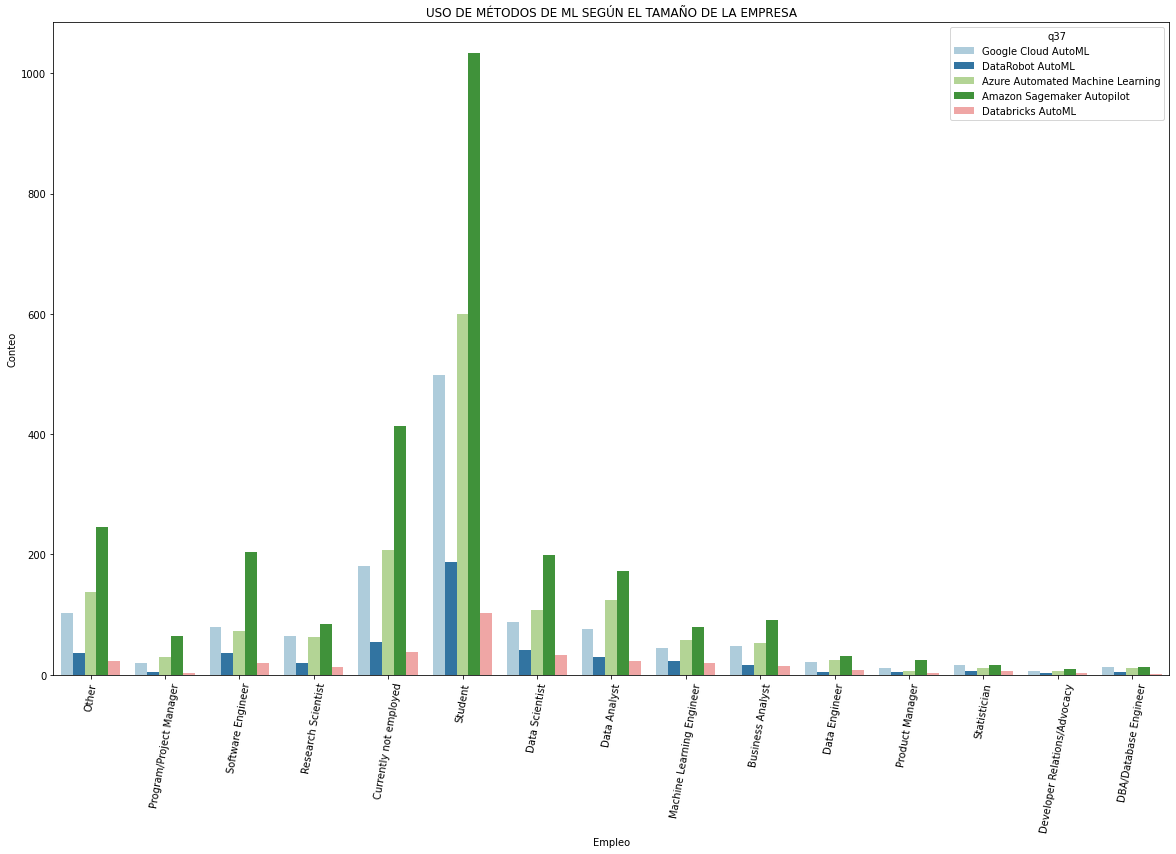

In [24]:
plt.figure(figsize=(20,12))
fig = sns.countplot(data = q5_q37, x = 'q_5_role', hue = 'q37', palette='Paired')
plt.title("HERRAMIENTA POR LA QUE APUESTAN EN LOS PRÓXIMOS DOS AÑOS")
fig.set(ylabel='Conteo', xlabel = 'Empleo')
fig.set_title("USO DE MÉTODOS DE ML SEGÚN EL TAMAÑO DE LA EMPRESA")
plt.xticks(rotation=80)

plt.show(); 

### `q25  sueldo  y q37b ml tools en dos años` 

- ¿Cuál es la herramienta por la que apuestan(dependiendo del sueldo), que va a despuntar en 2 años?

In [25]:
d1['q_25_yearly_compensation'].unique()

array(['25,000-29,999', '60,000-69,999', '$0-999', '30,000-39,999', nan,
       '15,000-19,999', '70,000-79,999', '2,000-2,999', '10,000-14,999',
       '5,000-7,499', '20,000-24,999', '1,000-1,999', '100,000-124,999',
       '7,500-9,999', '4,000-4,999', '40,000-49,999', '50,000-59,999',
       '3,000-3,999', '300,000-499,999', '200,000-249,999',
       '125,000-149,999', '250,000-299,999', '80,000-89,999',
       '90,000-99,999', '150,000-199,999', '>$1,000,000',
       '$500,000-999,999'], dtype=object)

In [26]:
column = ['q_25_yearly_compensation']

for i in column: 
    d1[i] = d1[i].str.replace(",", ".")

In [27]:
q25 = d1['q_25_yearly_compensation'].reset_index()

In [30]:
q25_q37 = pd.concat([q25,d37], axis = 1)

In [31]:
q25_q37

,index,q_25_yearly_compensation,q37
0,0,25.000-29.999,None
1,1,60.000-69.999,Google Cloud AutoML
2,2,$0-999,DataRobot AutoML
3,3,30.000-39.999,None
4,4,30.000-39.999,None
...,...,...,...
25968,25968,15.000-19.999,None
25969,25969,NaN,None
25970,25970,$0-999,None
25971,25971,NaN,None


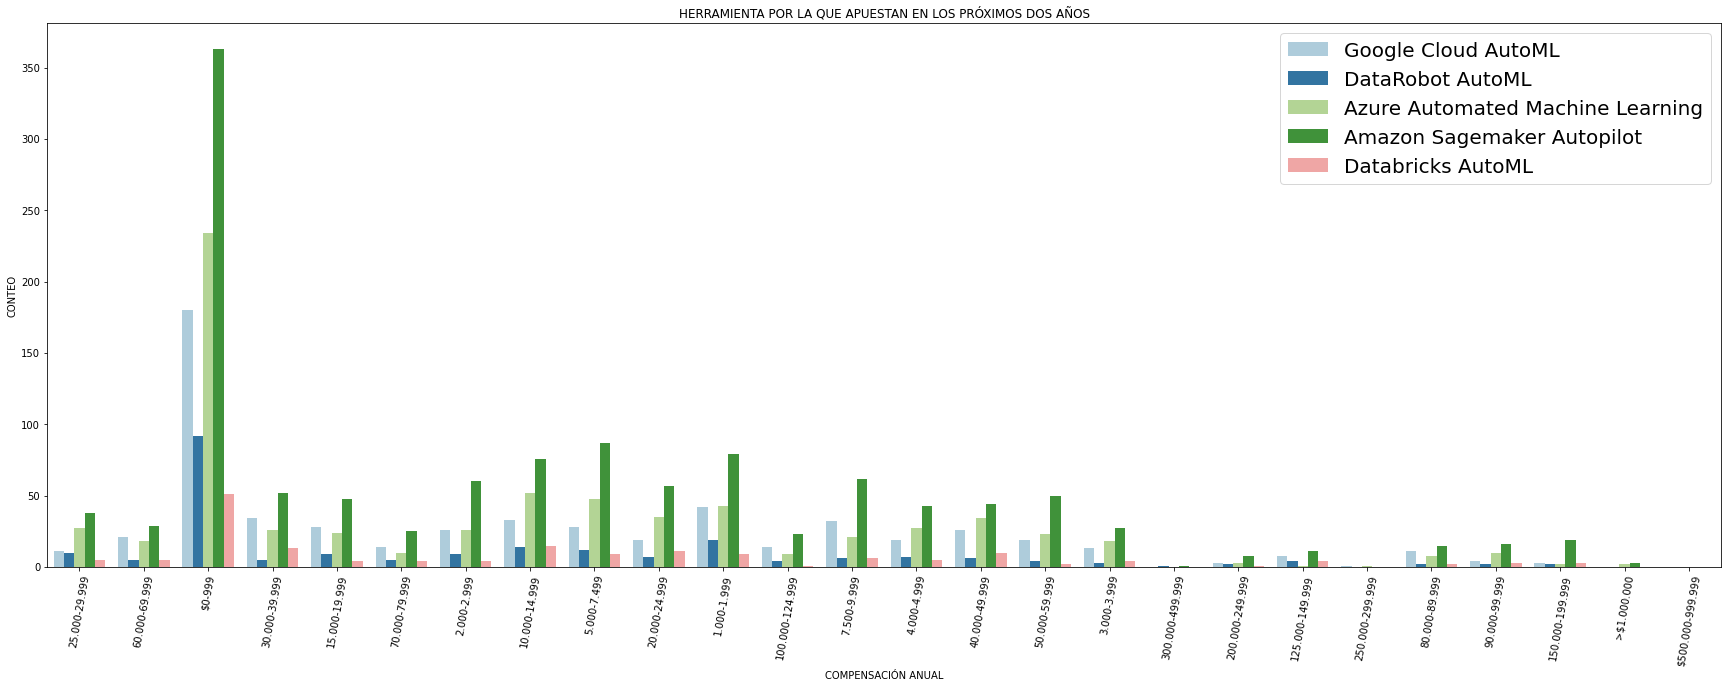

In [60]:
plt.figure(figsize=(30,10))
fig = sns.countplot(data = q25_q37, x = 'q_25_yearly_compensation', hue = 'q37', palette='Paired')
fig.set(ylabel='CONTEO', xlabel = 'COMPENSACIÓN ANUAL')
plt.title("HERRAMIENTA POR LA QUE APUESTAN EN LOS PRÓXIMOS DOS AÑOS")
legend = plt.legend (title = 'HERRAMIENTAS', title_fontsize = 15)
legend._legend_box.sep = 20

plt.xticks(rotation=80)
plt.legend(prop={'size':20}, loc='upper right')

plt.show(); 